# Sarita - DSWDEOB 26082022

# Dimension Reduction

## Data Collection

Data: 
   The details are obtained from the wine manufacturer.

Data Dictionary:
- Dataset contains 178 data of wine
- 14 features are recorded for each wine

Description:
- Type             Type of wine
-   Alcohol        Quantity of Alcohol
-   Malic          Quantity of malic acid
-  Ash             Quantity of ash
-   Alcalinity      AlkLINITY IN WINE
-   Magnesium        Quantity of magnesium in wine
-  Phenols          Quantity of phenols in wine
-   Flavanoids       Quantity of Flavanoids in wine
-  Nonflavanoids    Quantity of NonFlavanoids in wine
-  Proanthocyanins  Quantity of Proanthocyanins in wine
-  Color            color of wine
-  Hue              a particular shade of wine
-  Dilution         how much diluted
-  Proline          Quantity of proline in wine

#### Install the required packages if not available

In [1]:
!pip install feature_engine
!pip install dtale

**Importing required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import TruncatedSVD
from kneed import KneeLocator

### Suppress the Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Import the data**

In [3]:
df = pd.read_csv(r"C:\Users\Ajay Nandal\Downloads\Datasets_PCA_Problem Statement\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***Descriptive Statistics and Data Distribution Function***

In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Data Preprocessing

In [6]:
# Drop the unwanted features
df1 = df.drop(["Type"], axis = 1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## Checking Null Values

In [8]:
df1.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

### SVD can be implemented only on Numeric features

In [9]:
numeric_features = df1.select_dtypes(exclude = ['object']).columns

In [10]:
numeric_features

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

## Define the Pipeline steps

#### Define SVD model

In [11]:
svd = TruncatedSVD(n_components = 6)

## Make Pipeline

**By using mean imputation, null values can be imputed**

**Data has to be standardized to address the scale difference**

In [12]:
num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler(), svd)

In [13]:
# Pass the raw data through pipeline

processed = num_pipeline.fit(df1[numeric_features]) 

In [14]:
processed

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('truncatedsvd', TruncatedSVD(n_components=6))])

In [15]:
# Apply the pipeline on the dataset
wine = pd.DataFrame(processed.transform(df1[numeric_features]))

wine

,0,1,2,3,4,5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


## Save the End to End SVD pipeline with Imputation and Standardization

In [16]:
import joblib

joblib.dump(processed, 'Data_prep_DimRed')

['Data_prep_DimRed']

In [17]:
import os 
os.getcwd()

'C:\\Users\\Ajay Nandal'

## Import the pipeline

In [18]:
model = joblib.load("Data_prep_DimRed")

In [19]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('truncatedsvd', TruncatedSVD(n_components=6))])

## Apply the saved model on to the Dataset to extract SVD values

In [20]:
svd_res = pd.DataFrame(model.transform(df1[numeric_features]))

_res

,0,1,2,3,4,5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


# SVD for Feature Extraction

In [21]:
# Final dataset with manageable number of columns (Feature Extraction)

final = pd.concat([df.Alcohol, svd_res.iloc[:, 0:2]], axis = 1)
final.columns = ['Alcohol', 'svd0', 'svd1']
final

,Alcohol,svd0,svd1
0,14.23,3.316751,-1.443463
1,13.20,2.209465,0.333393
2,13.16,2.516740,-1.031151
3,14.37,3.757066,-2.756372
4,13.24,1.008908,-0.869831
...,...,...,...
173,13.71,-3.370524,-2.216289
174,13.40,-2.601956,-1.757229
175,13.27,-2.677839,-2.760899
176,13.17,-2.387017,-2.297347


0      Text(3.3167508122147784, -1.4434626343180097, ...
1      Text(2.209464916918848, 0.3333928870802998, '1...
2      Text(2.5167401466103834, -1.0311512962743195, ...
3      Text(3.757065609773206, -2.7563719137107126, '...
4      Text(1.0089084937957165, -0.8698308214172038, ...
                             ...                        
173    Text(-3.370524145442865, -2.216289139861133, '...
174    Text(-2.6019558512247403, -1.7572293509792722,...
175    Text(-2.677839460864506, -2.7608991316745426, ...
176    Text(-2.387017091279723, -2.2973466797128164, ...
177    Text(-3.2087581641980263, -2.7689195660475714,...
Length: 178, dtype: object

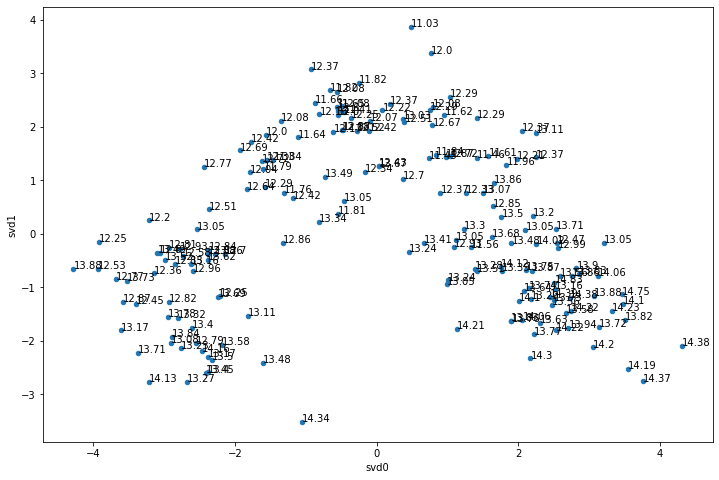

In [22]:
# Scatter diagram
ax = final.plot(x = 'svd0', y = 'svd1', kind = 'scatter', figsize = (12, 8))
final[['svd0', 'svd1', 'Alcohol']].apply(lambda x: ax.text(*x), axis = 1)

# Prediction on new data

In [23]:
#newdf = pd.read_excel(r"C:\Users\Ajay Nandal\Downloads\University_Clustering\new_Univ_4_pred.xlsx")

#newdf

In [37]:
# Drop the unwanted features
#newdf1 = newdf.drop(["UnivID"], axis = 1)

In [38]:
#num_feat = newdf1.select_dtypes(exclude = ['object']).columns

In [39]:
#new_res = pd.DataFrame(model.transform(newdf1[numeric_features]))

#new_res